# Linear Regression

Linear regression is one of the simplest models there is. It assumes that there is a linear relation between the attributes to the target variable. It is very simple but it also works very good. 

"All models are wrong, but some are useful".  
-- <cite> George Box.
    
What it is trying to find is the relationship:
$$Y = \beta_{0} + \beta_{1}X$$
Which is basically the line equation. We want to find those coefficients, beta 0 and beta 1. It can be extended to n attributes and n + 1 unknown coefficients.

Here we are dealing with estimates, not the true value, so we can use the following formula:
    
$$\hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}*x_{i}$$

Which is the prediction of our regression. Then, we need the residual, which is:
$$e_{i} = y_{i} - \hat{y}_{i}$$
    
The true value minus the predicted value for the i point. The sum of all the squared errors is the function that the regression must minimize.
    $$RSS = e^{2}_{1} + e^{2}_{2} + ... + e^{2}_{n}$$
But we can expand that expression into:
$$RSS = (y_{1} - \hat{y}_{1})^{2} + (y_{2} - \hat{y}_{2})^{2} + ... + (y_{n} - \hat{y}_{n})^{2}$$

Even more:
$$RSS = (y_{1} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{1})^{2} + (y_{2} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{2})^{2} + ... + (y_{n} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{3})^{2}$$
    
They way of minimizing the RSS, the algorithm will find the $\beta_{0}$ and $\beta_{1}$ that optimize the function.
    
$$\hat{\beta_{1}} = \frac{\sum^{n}_{i=1} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum^{n}_{i=1} (x_{i}-\bar{x})^{2}}$$
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} * \bar{x}$$

Now, implement a linear regression without sklearn. In other words, find both coefficients and the Residual Sum of Squares (RSS). We are using a dataset about Teen Birth Rate. We want to predict the teen birth rate depending on the poverty of the state. The dataset is from the United States.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('OLSDataset.txt',sep='\s+')

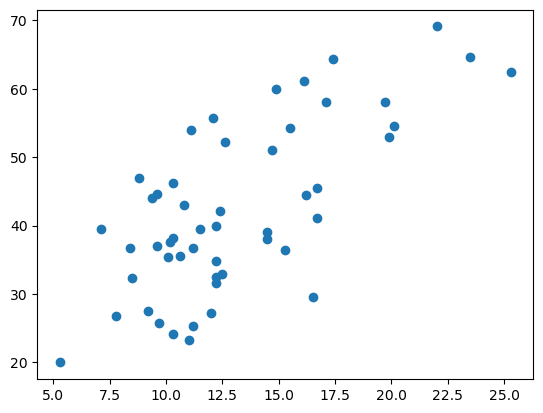

In [3]:
plt.scatter(data['PovPct'], data['TeenBrth']) 

In [4]:
# extract the independent and dependent variables
X = data['PovPct']
y = data['TeenBrth']

# calculate the slope and intercept of the regression line
def calcuate_y_hat(X,y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    slope = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2)
    intercept = y_mean - slope * x_mean
    # calculate y_hat (the predicted values of y)
    y_hat = intercept + slope * X
    return y_hat,intercept,slope

#Calculate MSE
def calculate_MSE(y,y_hat_):
    return np.sum((y-y_hat_)**2)/len(y)

# print the first 5 predicted values
y_hat=calcuate_y_hat(X,y)[0]

In [5]:
def plot_graph(X_train,y,y_hat,X_name,y_name,labela):
    plt.scatter(X_train, y,label=labela) 
    plt.plot(X_train,y_hat,color='r')
    plt.xlabel(X_name)
    plt.ylabel(y_name)

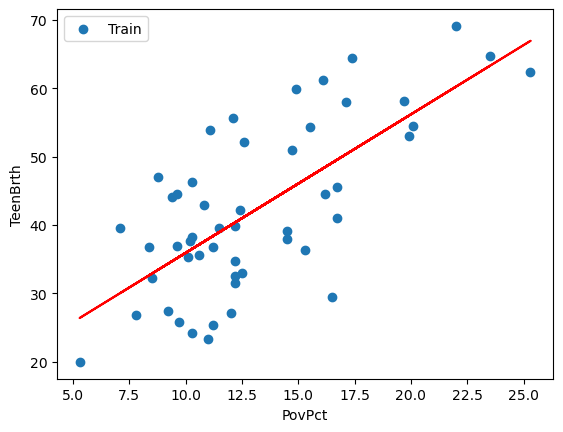

In [6]:
plot_graph(X,y,y_hat,'PovPct','TeenBrth',"Train")
plt.legend()
plt.show()

## Exercise

This time, do it the right way. Do a regression for three different train and test divisions, and then calculate the MSE for each one. Plot the three regressions.

In [7]:
data

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1
5,Colorado,8.8,26.2,79.1,5.8,47.0
6,Connecticut,9.7,14.1,45.1,4.6,25.8
7,Delaware,10.3,24.7,77.8,3.5,46.3
8,District_of_Columbia,22.0,44.8,101.5,65.0,69.1
9,Florida,16.2,23.2,78.4,7.3,44.5


MSE of train:  57.794279530903175
MSE of test:  80.82982137317035


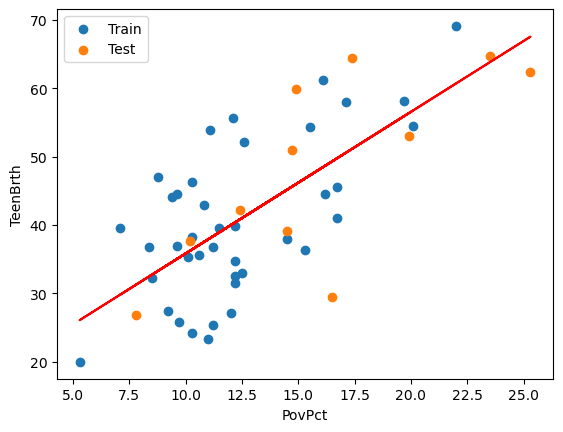

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# extract the independent and dependent variables
X_train = data_train['PovPct']
y_train = data_train['TeenBrth']

#y_hat_train, intercept and slope
y_hat_train,intercept,slope=calcuate_y_hat(X_train,y_train)
ErrorMSE_train=calculate_MSE(y,y_hat_train)

X_test = data_test['PovPct']
y_test = data_test['TeenBrth']

#y_hat_test
y_hat_test=intercept+slope*X_test


ErrorMSE_test=calculate_MSE(y_test,y_hat_test)
print("MSE of train: ",ErrorMSE_train)
print("MSE of test: ",ErrorMSE_test)
plot_graph(X_train,y_train,y_hat_train,"PovPct",'TeenBrth',"Train")
plot_graph(X_test,y_test,y_hat_test,"PovPct",'TeenBrth',"Test")
plt.legend()
plt.show()


MSE of train:  2.7409688915030106
MSE of test:  2.834944825948691


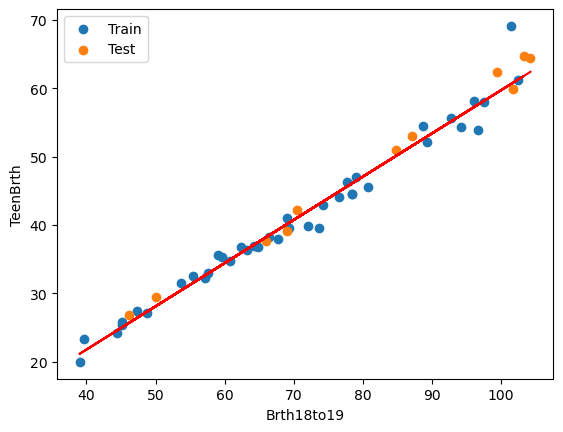

In [9]:
# Split the data into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# extract the independent and dependent variables
X_train = data_train['Brth18to19']
y_train = data_train['TeenBrth']

#y_hat_train, intercept and slope
y_hat_train,intercept,slope=calcuate_y_hat(X_train,y_train)
ErrorMSE_train=calculate_MSE(y,y_hat_train)

X_test = data_test['Brth18to19']
y_test = data_test['TeenBrth']

#y_hat_test
y_hat_test=intercept+slope*X_test


ErrorMSE_test=calculate_MSE(y_test,y_hat_test)
print("MSE of train: ",ErrorMSE_train)
print("MSE of test: ",ErrorMSE_test)
plot_graph(X_train,y_train,y_hat_train,"Brth18to19",'TeenBrth',"Train")
plot_graph(X_test,y_test,y_hat_test,"Brth18to19",'TeenBrth',"Test")
plt.legend()
plt.show()

MSE of train:  4.898123648762846
MSE of test:  6.25330032548257


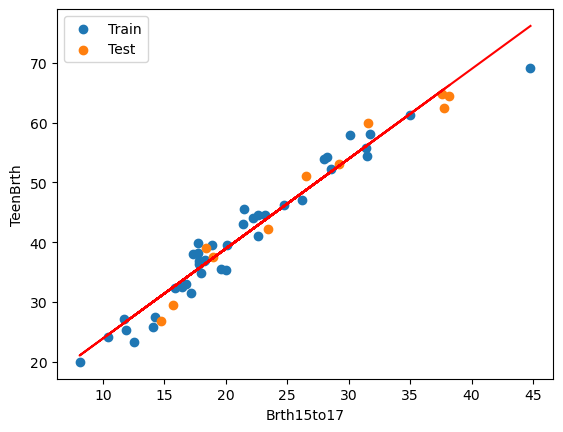

In [10]:
# Split the data into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# extract the independent and dependent variables
X_train = data_train['Brth15to17']
y_train = data_train['TeenBrth']

#y_hat_train, intercept and slope
y_hat_train,intercept,slope=calcuate_y_hat(X_train,y_train)
ErrorMSE_train=calculate_MSE(y,y_hat_train)

X_test = data_test['Brth15to17']
y_test = data_test['TeenBrth']

#y_hat_test
y_hat_test=intercept+slope*X_test


ErrorMSE_test=calculate_MSE(y_test,y_hat_test)
print("MSE of train: ",ErrorMSE_train)
print("MSE of test: ",ErrorMSE_test)
plot_graph(X_train,y_train,y_hat_train,"Brth15to17",'TeenBrth',"Train")
plot_graph(X_test,y_test,y_hat_test,"Brth15to17",'TeenBrth',"Test")
plt.legend()
plt.show()

# Multiple Linear Regression

The same can be done but with multiple attributes. In this case, there will be one coefficient for each attribute:  

$$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} + \epsilon$$  


Use the following dataset, to predict the G3 column. It is the grade of the year for the students. Multiple variables are categorical, remember to convert them to numerical. Other columns might not add value to the prediction, so you can also do some feature engineering. 

Usually while computing regression, we need to add a new column for the intercept term, in the data. That way we can do:
$$f(x') = \beta^{'T}x'$$
Because $\beta'$ will contain the intercept term, $\beta' = (\beta_{0},\beta_{1},...,\beta_{n})$

That gives us the following equation:

$$y = X*\beta+\epsilon$$

The optimization problem is to find the $\hat\beta$ that minimize the loss $L(\hat{\beta}) = \hat{\epsilon}^{T}\hat{\epsilon}$
The solution is:

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

Inverting takes $O(n^{3})$ so it is unfeasible for datasets with many dimensions.

In [11]:
X = data[["PovPct","Brth15to17","Brth18to19","ViolCrime"]]
y = data['TeenBrth']

In [12]:
X = X.to_numpy()
y = y.to_numpy()

In [13]:
import statsmodels.api as sm

In [14]:
# Add a column of ones to X to represent the intercept term
X = sm.add_constant(X)

# Calculate the coefficients using the normal equation
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Print the coefficients
print('Coefficients:', coefficients)

Coefficients: [-0.39935422  0.07665873  0.55653209  0.40356456  0.02183391]


In [15]:
# Create a model and fit it to the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5842.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.33e-61
Time:                        22:43:10   Log-Likelihood:                -41.001
No. Observations:                  51   AIC:                             92.00
Df Residuals:                      46   BIC:                             101.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3994      0.415     -0.962      0.3

In [16]:
X = data[["PovPct","Brth15to17","Brth18to19"]]
y = data['TeenBrth']
# Create a model and fit it to the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               TeenBrth   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.914e+04
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                    5.45e-91
Time:                        22:43:11   Log-Likelihood:                         -42.661
No. Observations:                  51   AIC:                                      91.32
Df Residuals:                      48   BIC:                                      97.12
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Polynomial Regression

What if the data is not linear? In that case, a linear regression wouldn't work because it does not capture how the data is. Then, we can try to fit a regression but in a with a higher polynomial. This can be done by transforming the data in the following way:


$$X = \begin{pmatrix}
1 & x_{1} & x_{1}^{2} & x_{1}^{3}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3}\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{3} & x_{3}^{2} & x_{3}^{3}\\
\end{pmatrix}$$

We take each input and take it into a higher polynomial. Also, include the intercept term. We can do it again by hand, but in this case, we are going to use our friend Sklearn.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [18]:
def functionf(x):
    arr = []
    for i in x:
        arr.append(2-i+(i**2))
    return np.array(arr)

In [19]:
def sample_ds(n):
    x = np.random.uniform(-3,3,n)
    e = np.random.normal(0,0.4,n)
    y = np.add(functionf(x),e)
    return x,y

## Exercise

Train a linear regression for polynomials between 1 and 8, calculate the MSE for training set, validation set and test set. Generate a train set of 10 points, then a validation set of 10 points and then a test set of 1000 points. Fit a linear regression with polynomial features.

In [20]:
data=sample_ds(20)

In [21]:
data_train_x, data_validation_x,data_train_y,data_validation_y = train_test_split(data[0],data[1], test_size=0.5, random_state=42)

# Create a pipeline to generate polynomial features and fit a linear regression model

def train_model(data_train_x,data_train_y,degree_pol):
    X_new=data_train_x[:, np.newaxis]
    model = make_pipeline(PolynomialFeatures(degree_pol), LinearRegression())
    model.fit(X_new, data_train_y)
    # Predict on some new data
    y_pred = model.predict(X_new)
    MSE_a=calculate_MSE(y_pred,data_train_y)
    X_new2=np.arange(-3,3.1,0.05)
    X_new2=X_new2[:, np.newaxis]
    y_pred2 = model.predict(X_new2)
    X_new2 =X_new2.flatten()
    index_order=np.argsort(X_new2)
    X_new2=X_new2[index_order]
    y_pred2=y_pred2[index_order]
    return X_new2,y_pred2,model,MSE_a

def validation(data_valx,data_valy,model):
    X_new=data_valx[:, np.newaxis]
    y_pred = model.predict(X_new)
    X_new =X_new.flatten()
    index_order=np.argsort(X_new)
    MSE_a=calculate_MSE(y_pred,data_valy)
    return MSE_a


MSE validation:  0.13378056133558563


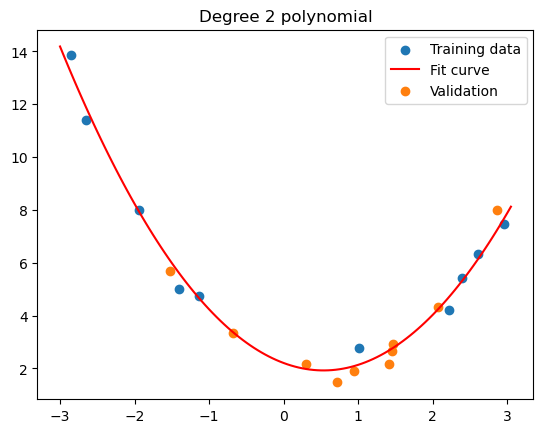

MSE validation:  0.2601485185139705


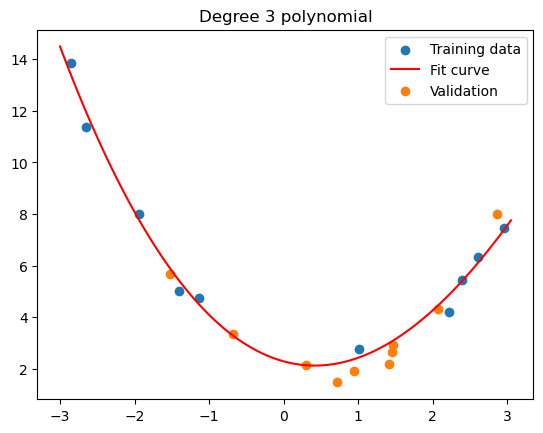

MSE validation:  0.36550279023572035


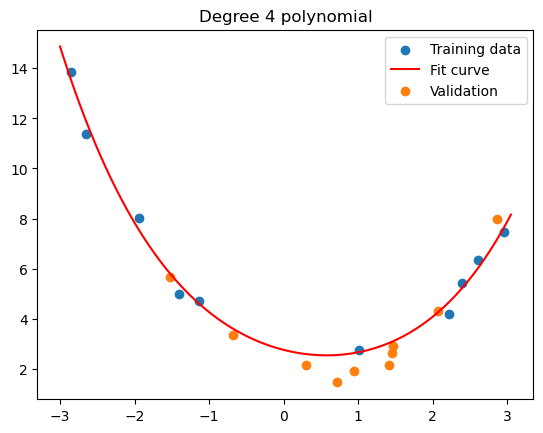

MSE validation:  0.35052021708806597


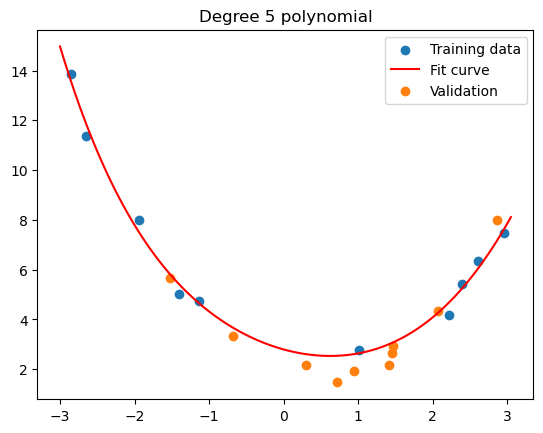

MSE validation:  0.3620662449594109


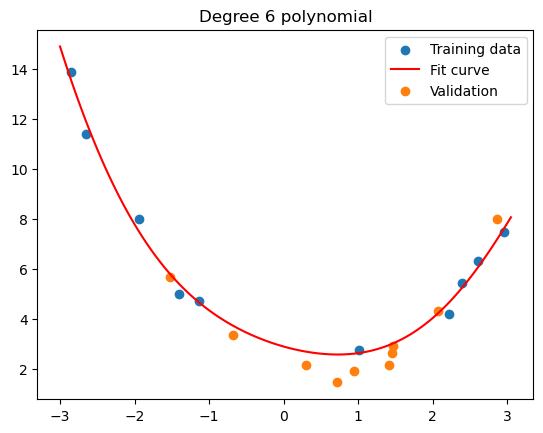

MSE validation:  0.4829331046722783


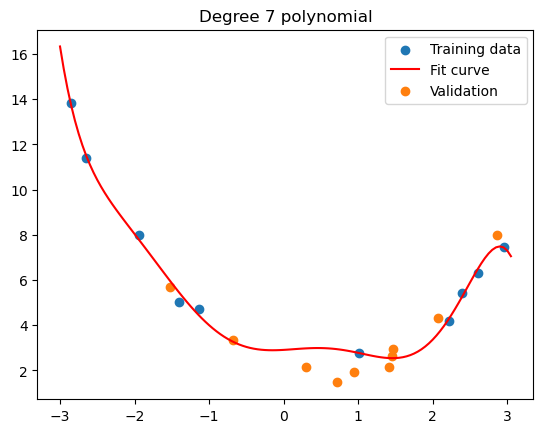

MSE validation:  7.4164557408302345


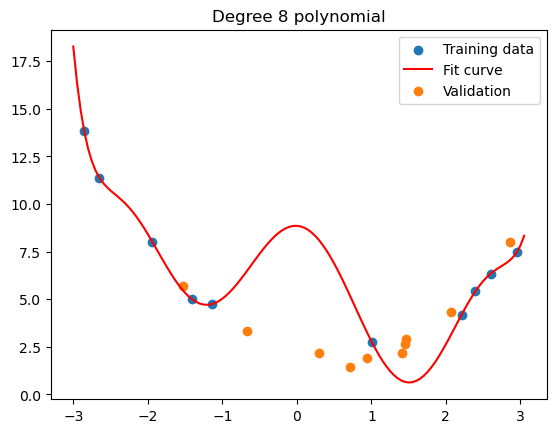

Degree with less MSE:  2


In [22]:
data_train_x_proccesing,y_pred,model,_=train_model(data_train_x,data_train_y,1)
MSE_aval=validation(data_validation_x,data_validation_y,model)
degree=1
save_model=model
#Validation for 8 polynomial, get the polinomial, with the lowest MSE using validation set
for i in range(2,9):
    data_train_x_proccesing,y_pred,model,_=train_model(data_train_x,data_train_y,i)
    MSE_val=validation(data_validation_x,data_validation_y,model)
    print("MSE validation: ", MSE_val)
    plt.scatter(data_train_x, data_train_y, label='Training data')
    plt.plot(data_train_x_proccesing,y_pred, color='r', label='Fit curve')
    plt.scatter(data_validation_x,data_validation_y,label="Validation")
    plt.title("Degree {} polynomial".format(i))
    plt.legend()
    plt.show()
    if MSE_val<MSE_aval:
        MSE_aval=MSE_val
        degree=i
        save_model=model
        save_fitcurve_x,save_fitcurve_y=data_train_x_proccesing,y_pred
print("Degree with less MSE: ",degree)




The MSE for test is: 0.18759776365071956


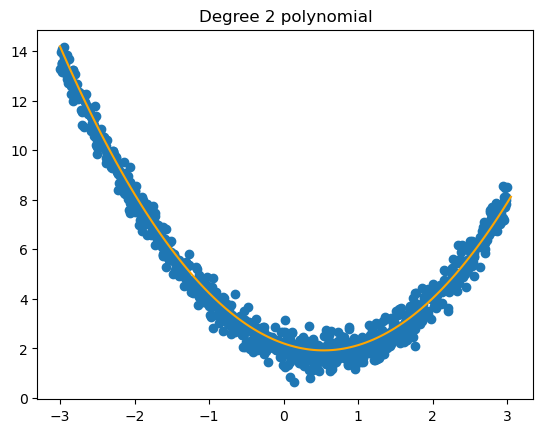

In [23]:
#Test the model with 1000 points and find the MSE
data_test=sample_ds(1000)
data_test_x,data_test_y=data_test
MSE_test=validation(data_test_x,data_test_y,save_model)
print("The MSE for test is:", MSE_test)
plt.scatter(data_test_x,data_test_y)
plt.plot(save_fitcurve_x,save_fitcurve_y,color="orange")
plt.title("Degree {} polynomial".format(degree))
plt.show()